<a href="https://colab.research.google.com/github/FranziskoB/Regressao_simples_multipla/blob/main/07_Heterocedasticidade_modelos_regrecao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DIAGNÓSTICO DE HETEROCEDASTICIDADE EM MODELOS DE REGRESSÃO 

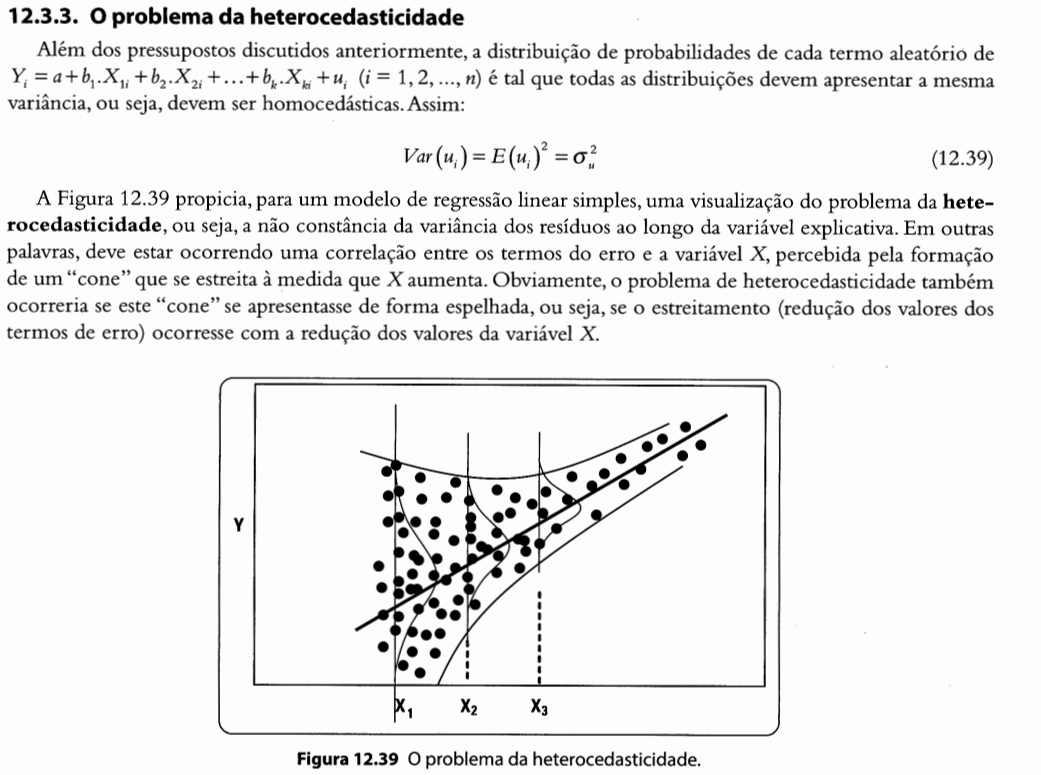

FÁVERO, Luiz Paulo Lopes e BELFIORE, Patrícia Prado. Manual de análise de dados: estatística e modelagem multivariada com excel, SPSS e stata. . Rio de Janeiro: Elsevier. . Acesso em: 05 mar. 2023. , 2017

##Importação das bibliotecas

In [ ]:
import pandas as pd # manipulação de dado em formato de dataframe
import seaborn as sns # biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt # biblioteca de visualização de dados
import statsmodels.api as sm # biblioteca de modelagem estatística
import numpy as np # biblioteca para operações matemáticas multidimensionais
from statsmodels.iolib.summary2 import summary_col
from skimage import io
import plotly.graph_objs as go
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder

##Importando os dados

In [ ]:
df_saeb_rend = pd.read_csv("https://raw.githubusercontent.com/FranziskoB/Regressao_simples_multipla/main/dados/saeb_rend.csv", delimiter=',')
df_saeb_rend.head(5)

,uf,municipio,codigo,escola,rede,saeb,rendimento
0,RO,Alta Floresta D'Oeste,11024666,EMEIEF BOA ESPERANCA,Municipal,5.331833,0.766092
1,RO,Alta Floresta D'Oeste,11024682,EEEF EURIDICE LOPES PEDROSO,Estadual,NaN,0.910890
2,RO,Alta Floresta D'Oeste,11024828,EMEIEF IZIDORO STEDILE,Municipal,5.432333,0.884658
3,RO,Alta Floresta D'Oeste,11024917,EMEIEF JOSE BASILIO DA GAMA,Municipal,NaN,NaN
4,RO,Alta Floresta D'Oeste,11024968,EEEFM JUSCELINO KUBITSCHEK DE OLIVEIRA,Estadual,5.568833,0.957629


In [ ]:
df_saeb_rend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43607 entries, 0 to 43606
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uf          43607 non-null  object 
 1   municipio   43607 non-null  object 
 2   codigo      43607 non-null  int64  
 3   escola      43607 non-null  object 
 4   rede        43607 non-null  object 
 5   saeb        25538 non-null  float64
 6   rendimento  37324 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 2.3+ MB


In [ ]:
df_saeb_rend.describe()

,codigo,saeb,rendimento
count,4.360700e+04,25538.000000,37324.000000
mean,3.112734e+07,5.047511,0.856967
std,9.956731e+06,0.753718,0.110447
min,1.100026e+07,2.053000,0.247282
25%,2.316996e+07,4.554542,0.791561
50%,3.108142e+07,5.069500,0.878536
75%,3.590717e+07,5.551458,0.944761
max,5.306821e+07,8.588000,1.000000


Tabela de frequências absolutas das variáveis 'uf' e rede'

In [ ]:
df_saeb_rend['uf'].value_counts()

SP    5753
MG    4399
BA    3539
RS    3315
CE    2971
MA    2761
RJ    2310
PA    2046
PR    1886
PE    1866
SC    1742
GO    1400
PI    1289
PB    1075
AM     972
MT     966
RN     859
ES     831
AL     718
MS     643
SE     562
TO     515
RO     468
DF     217
AC     204
AP     172
RR     128
Name: uf, dtype: int64

In [ ]:
df_saeb_rend['rede'].value_counts()

Municipal    22610
Estadual     20959
Federal         38
Name: rede, dtype: int64

## Análises gráficas

Plotando 'saeb' em função de 'rendimento', com linear fit

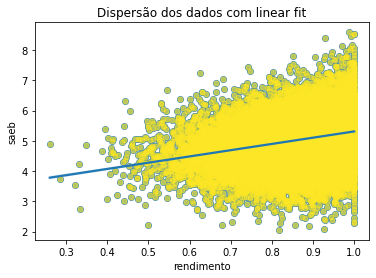

In [ ]:
x = df_saeb_rend['rendimento']
y = df_saeb_rend['saeb']
plt.plot(x, y, 'o', color='#FDE725FF', markersize=5, alpha=0.6)
sns.regplot(x="rendimento", y="saeb", data=df_saeb_rend)
plt.title('Dispersão dos dados com linear fit')
plt.xlabel('rendimento')
plt.ylabel('saeb')
plt.show()

 Plotando 'saeb' em função de 'rendimento',com destaque para 'rede' escolar

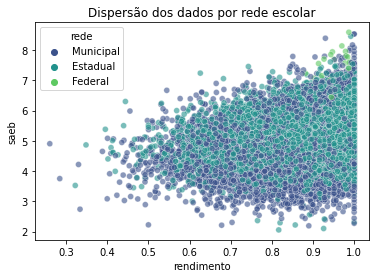

In [ ]:
sns.scatterplot(x="rendimento", y="saeb", data=df_saeb_rend,
                hue="rede", alpha=0.6, palette = "viridis")
plt.title('Dispersão dos dados por rede escolar')
plt.xlabel('rendimento')
plt.ylabel('saeb')
plt.show()


Plotando 'saeb' em função de 'rendimento',com destaque para 'rede' escolar e linear fits

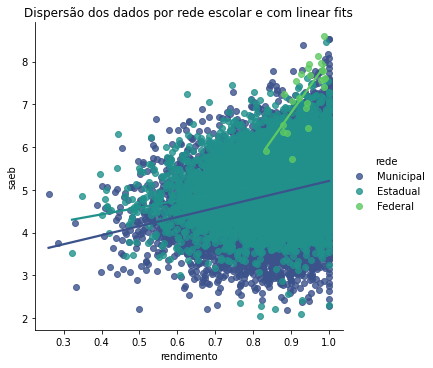

In [ ]:
sns.lmplot(x="rendimento", y="saeb", data=df_saeb_rend,
           hue="rede", ci=None, palette="viridis")
plt.title('Dispersão dos dados por rede escolar e com linear fits')
plt.xlabel('rendimento')
plt.ylabel('saeb')
plt.show()


## Estimação do modelo de regressão

In [ ]:
# Estimando o modelo
modelo_saeb = sm.OLS.from_formula('saeb ~ rendimento', df_saeb_rend).fit()

# Parâmetros do modelo
modelo_saeb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   saeb   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     2126.
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:11:20   Log-Likelihood:                -27984.
No. Observations:               25530   AIC:                         5.597e+04
Df Residuals:                   25528   BIC:                         5.599e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2425      0.039     82.277      0.000       3.165       3.320
rendimento     2.0665      0.045     46.111      0.000       1.979       2.154
==============================================================================
Omnibus:                      152.496   Durbin-Watson:                   1.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.269
Skew:                          -0.091   Prob(JB):                     1.97e-44
Kurtosis:                       3.395   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Diagnóstico de heterocedasticidade


Teste de Breusch-Pagan/Cook-Weisberg, que se baseia no multiplicador de Lagrange (LM), apresenta, como hipótese nula, o fato de a variância dos termos de erro ser constante (erros homocedásticos) e, como 
hipótese alternativa, o fato de a variância dos termos de erro não ser constante, ou seja, os termos de erro serem 
uma função de uma ou mais variáveis explicativas (erros heterocedásticos). É importante mencionar que este teste é indicado para os casos em que a suposição de normalidade dos resíduos for verificada.

FÁVERO, Luiz Paulo Lopes e BELFIORE, Patrícia Prado. Manual de análise de dados: estatística e modelagem multivariada com excel, SPSS e stata. . Rio de Janeiro: Elsevier. . Acesso em: 05 mar. 2023. , 2017

Criação da função 'breusch_pagan_test'

In [ ]:
from scipy import stats

def breusch_pagan_test(modelo):

    df = pd.DataFrame({'yhat':modelo.fittedvalues,
                       'resid':modelo.resid})
   
    df['up'] = (np.square(df.resid))/np.sum(((np.square(df.resid))/df.shape[0]))
   
    modelo_aux = sm.OLS.from_formula('up ~ yhat', df).fit()
   
    anova_table = sm.stats.anova_lm(modelo_aux, typ=2)
   
    anova_table['sum_sq'] = anova_table['sum_sq']/2
    
    chisq = anova_table['sum_sq'].iloc[0]
   
    p_value = stats.chi2.pdf(chisq, 1)*2
    
    print(f"chisq: {chisq}")
    
    print(f"p-value: {p_value}")
    
    return chisq, p_value

## Teste de Breusch-Pagan

In [ ]:
breusch_pagan_test(modelo_saeb)

chisq: 16.72070032595309
p-value: 4.565190314939401e-05


(16.72070032595309, 4.565190314939401e-05)

###Presença de heterocedasticidad: Omissão de variável(is) explicativa(s)relevante(s)

*   H0 do teste: ausência de heterocedasticidade.
*   H1 do teste: heterocedasticidade, ou seja, correlação entre resíduos euma ou mais variáveis explicativas, o que indica omissão de variável relevante!

##Estimação do modelo de regressão múltipla com n-1 dummies

Dummizando a variável 'uf'

In [ ]:

df_saeb_rend_dummies = pd.get_dummies(df_saeb_rend, columns=['uf'],
                                      drop_first=True)

df_saeb_rend_dummies.head(10)

,municipio,codigo,escola,rede,saeb,rendimento,uf_AL,uf_AM,uf_AP,uf_BA,...,uf_PR,uf_RJ,uf_RN,uf_RO,uf_RR,uf_RS,uf_SC,uf_SE,uf_SP,uf_TO
0,Alta Floresta D'Oeste,11024666,EMEIEF BOA ESPERANCA,Municipal,5.331833,0.766092,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Alta Floresta D'Oeste,11024682,EEEF EURIDICE LOPES PEDROSO,Estadual,NaN,0.910890,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Alta Floresta D'Oeste,11024828,EMEIEF IZIDORO STEDILE,Municipal,5.432333,0.884658,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Alta Floresta D'Oeste,11024917,EMEIEF JOSE BASILIO DA GAMA,Municipal,NaN,NaN,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Alta Floresta D'Oeste,11024968,EEEFM JUSCELINO KUBITSCHEK DE OLIVEIRA,Estadual,5.568833,0.957629,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,Alta Floresta D'Oeste,11025077,EMEIEF MARIA DE SOUZA PEGO,Municipal,5.152833,0.897852,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,Alta Floresta D'Oeste,11025115,EMEIEF MARTIM AFONSO DE SOUZA,Municipal,NaN,NaN,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,Alta Floresta D'Oeste,11025310,EMEIEF PEDRO ALEIXO,Municipal,5.608333,0.599606,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,Alta Floresta D'Oeste,11025352,EMEIEF POTY,Municipal,4.617000,0.799311,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,Alta Floresta D'Oeste,11025620,EEEF TANCREDO DE ALMEIDA NEVES,Estadual,NaN,0.916305,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
lista_colunas = list(df_saeb_rend_dummies.drop(columns=['municipio',
                                                        'codigo',
                                                        'escola',
                                                        'rede',
                                                        'saeb']).columns)
formula_dummies_modelo = ' + '.join(lista_colunas)
formula_dummies_modelo = "saeb ~ " + formula_dummies_modelo
print("Fórmula utilizada: ",formula_dummies_modelo)

modelo_saeb_dummies_uf = sm.OLS.from_formula(formula_dummies_modelo,
                                               df_saeb_rend_dummies).fit()

Fórmula utilizada:  saeb ~ rendimento + uf_AL + uf_AM + uf_AP + uf_BA + uf_CE + uf_DF + uf_ES + uf_GO + uf_MA + uf_MG + uf_MS + uf_MT + uf_PA + uf_PB + uf_PE + uf_PI + uf_PR + uf_RJ + uf_RN + uf_RO + uf_RR + uf_RS + uf_SC + uf_SE + uf_SP + uf_TO


In [ ]:
#Parâmetros do modelo
modelo_saeb_dummies_uf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   saeb   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     497.5
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:16:39   Log-Likelihood:                -23604.
No. Observations:               25530   AIC:                         4.726e+04
Df Residuals:                   25502   BIC:                         4.749e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7566      0.071     53.118      0.000       3.618       3.895
rendimento     1.2444      0.044     28.057      0.000       1.157       1.331
uf_AL         -0.1680      0.065     -2.589      0.010      -0.295      -0.041
uf_AM         -0.2480      0.063     -3.949      0.000      -0.371      -0.125
uf_AP         -0.5356      0.091     -5.900      0.000      -0.714      -0.358
uf_BA         -0.2451      0.060     -4.106      0.000      -0.362      -0.128
uf_CE          0.3591      0.059      6.072      0.000       0.243       0.475
uf_DF          0.4426      0.082      5.422      0.000       0.283       0.603
uf_ES          0.5843      0.064      9.197      0.000       0.460       0.709
uf_GO          0.4936      0.061      8.103      0.000       0.374       0.613
uf_MA         -0.6703      0.060    -11.194      0.000      -0.788      -0.553
uf_MG          0.3983      0.059      6.774      0.000       0.283       0.514
uf_MS          0.5386      0.067      8.087      0.000       0.408       0.669
uf_MT         -0.0836      0.064     -1.305      0.192      -0.209       0.042
uf_PA         -0.4627      0.060     -7.654      0.000      -0.581      -0.344
uf_PB         -0.0913      0.063     -1.438      0.151      -0.216       0.033
uf_PE         -0.0279      0.060     -0.461      0.645      -0.146       0.091
uf_PI         -0.1084      0.062     -1.759      0.079      -0.229       0.012
uf_PR          0.6130      0.061     10.112      0.000       0.494       0.732
uf_RJ          0.3945      0.060      6.531      0.000       0.276       0.513
uf_RN         -0.0996      0.067     -1.483      0.138      -0.231       0.032
uf_RO          0.3881      0.068      5.738      0.000       0.256       0.521
uf_RR         -0.2887      0.105     -2.742      0.006      -0.495      -0.082
uf_RS          0.7146      0.060     11.993      0.000       0.598       0.831
uf_SC          0.6930      0.060     11.483      0.000       0.575       0.811
uf_SE         -0.0072      0.067     -0.108      0.914      -0.138       0.124
uf_SP          0.4371      0.059      7.448      0.000       0.322       0.552
uf_TO          0.1189      0.067      1.782      0.075      -0.012       0.250
==============================================================================
Omnibus:                      575.254   Durbin-Watson:                   1.434
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1122.751
Skew:                           0.147   Prob(JB):                    1.58e-244
Kurtosis:                       3.984   Cond. No.                         107.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Teste de Breusch-Pagan para diagnóstico de heterocedasticidade no 'modelo_saeb_dummies_uf

In [ ]:

breusch_pagan_test(modelo_saeb_dummies_uf)

chisq: 1.0756241898382393
p-value: 0.4493046942888865


(1.0756241898382393, 0.4493046942888865)

Plotando 'saeb' em função de 'rendimento',com destaque para UFs e linear fits

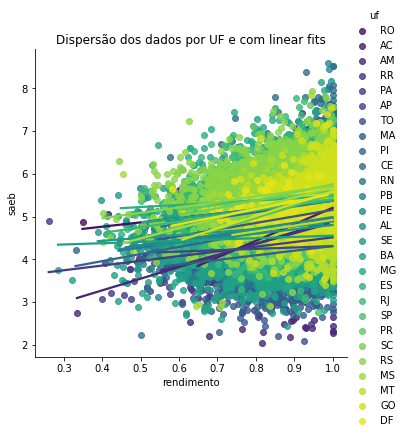

In [ ]:
sns.lmplot(x="rendimento", y="saeb", data=df_saeb_rend,
           hue="uf", ci=None, palette="viridis")
plt.title('Dispersão dos dados por UF e com linear fits')
plt.xlabel('rendimento')
plt.ylabel('saeb')
plt.show()